## Data Analytics Project - US STATE CRIME (1960-2019)

Autors: Agnieszka Welian, Katarzyna Wątorska
<br>
Date: 14-06-2022

# 1. Description of the data

From the Unified Crime Reporting Statistics and under the collaboration of the U.S. Department of Justice and the Federal Bureau of Investigation information crime statistics are available for public review. The following data set has information on the crime rates and totals for states across the United States for a wide range of years. The crime reports are divided into two main categories: property and violent crime. Property crime refers to burglary, larceny, and motor related crime while violent crime refers to assault, murder, rape, and robbery. These reports go from 1960 to 2019.

The main goal of this project will be to take into consideration values from 1960 to 2018 and predict value of specific crime rare for 2019 for selected state.

Source: https://think.cs.vt.edu/corgis/csv/state_crime/ (which are logged data from FBI page)

In [2]:
import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from cmdstanpy import CmdStanModel
import warnings

In [3]:
df = pd.read_csv("state_crime.csv", sep = ',')
df.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [4]:
df.columns

Index(['State', 'Year', 'Data.Population', 'Data.Rates.Property.All',
       'Data.Rates.Property.Burglary', 'Data.Rates.Property.Larceny',
       'Data.Rates.Property.Motor', 'Data.Rates.Violent.All',
       'Data.Rates.Violent.Assault', 'Data.Rates.Violent.Murder',
       'Data.Rates.Violent.Rape', 'Data.Rates.Violent.Robbery',
       'Data.Totals.Property.All', 'Data.Totals.Property.Burglary',
       'Data.Totals.Property.Larceny', 'Data.Totals.Property.Motor',
       'Data.Totals.Violent.All', 'Data.Totals.Violent.Assault',
       'Data.Totals.Violent.Murder', 'Data.Totals.Violent.Rape',
       'Data.Totals.Violent.Robbery'],
      dtype='object')

In [5]:
df.rename(columns = {'Data.Rates.Property.All':'Data_Rates_Property_All', 'Data.Population':'Data_Population'}, inplace = True)

In [6]:
print(df.Data_Rates_Property_All.describe())

count    3115.000000
mean     3422.746388
std      1575.438156
min        66.900000
25%      2357.650000
50%      3420.200000
75%      4433.900000
max      9512.100000
Name: Data_Rates_Property_All, dtype: float64


In [7]:
print(df.Data_Population.describe())

count    3.115000e+03
mean     9.708502e+06
std      3.506750e+07
min      2.261670e+05
25%      1.279156e+06
50%      3.358000e+06
75%      6.082836e+06
max      3.282395e+08
Name: Data_Population, dtype: float64


In [8]:
california = df[df['State'] == "California"]
california.tail()

,State,Year,Data_Population,Data_Rates_Property_All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
295,California,2015,39144818,253.8,2618.3,504.3,1677.1,426.3,135.0,4.8,...,24.0,99349,1024914,197404,656517,166883,52862,1861,12811,9387
296,California,2016,39250017,2553.0,479.8,1623.0,450.3,445.3,265.9,4.9,...,139.6,1002070,188304,637010,176756,174796,104375,1930,13702,54789
297,California,2017,39536653,2496.7,446.9,1623.9,425.9,449.3,264.2,4.6,...,143.2,987114,176690,642033,168391,177627,104454,1830,14721,56622
298,California,2018,39557045,2380.4,416.2,1571.8,392.4,447.4,266.5,4.4,...,137.3,941618,164632,621775,155211,176982,105412,1739,15505,54326
299,California,2019,39512223,2331.2,386.1,1586.3,358.8,441.2,267.1,4.3,...,132.4,921114,152555,626802,141757,174331,105541,1690,14799,52301


In [9]:
print(california.Data_Population.describe())

count    6.000000e+01
mean     2.855579e+07
std      7.628299e+06
min      1.571720e+07
25%      2.111550e+07
50%      2.941151e+07
75%      3.592007e+07
max      3.955704e+07
Name: Data_Population, dtype: float64


In [10]:
print(california.Data_Rates_Property_All.describe())

count      60.000000
mean     4359.176667
std      1702.765499
min       232.300000
25%      3177.725000
50%      4294.700000
75%      5760.975000
max      6939.500000
Name: Data_Rates_Property_All, dtype: float64


In [11]:
# sns.scatterplot(california['Year'], california['Data.Population'])

c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Data_Rates_Property_All'>

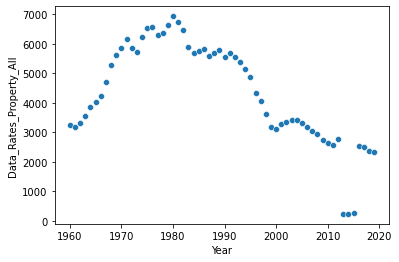

In [12]:
sns.scatterplot(california['Year'], california['Data_Rates_Property_All'])

c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Data_Population', ylabel='Data_Rates_Property_All'>

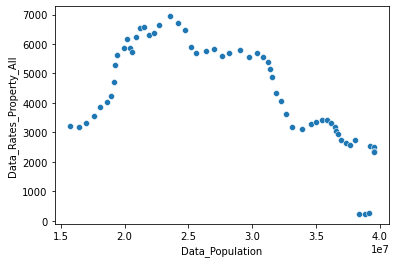

In [13]:
sns.scatterplot(california['Data_Population'], california['Data_Rates_Property_All'])

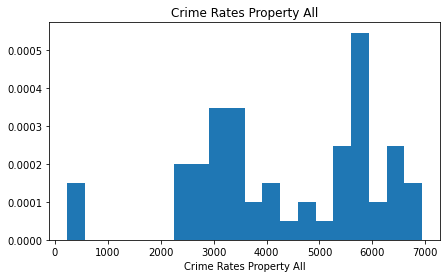

In [20]:
crime_rates_all = california['Data_Rates_Property_All'].to_numpy()
fig, ax = plt.subplots(1, 1, figsize = (7, 4))
ax.hist(crime_rates_all, bins = 20, density = True)
plt.xlabel('Crime Rates Property All')
plt.title(str('Crime Rates Property All'))
plt.show(ax)

# Prior predictive checks

In [15]:
with open('crime_ppc.stan', 'r') as file:
    print(file.read())


generated quantities {
    real mu = normal_rng(4359, 1703);
    real sigma = exponential_rng(1703);
    real crime_all_prior = normal_rng(mu, sigma);
}


In [16]:
crime_ppc_model = CmdStanModel(stan_file = 'crime_ppc.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [17]:
sim = crime_ppc_model.sample(iter_sampling = 1000, iter_warmup = 0, chains = 1, fixed_param = True, seed = 14062022)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [18]:
mu_sim = sim.stan_variable('mu')
sigma_sim = sim.stan_variable('sigma')
crime_prior_sim = sim.stan_variable('crime_all_prior')

# print(mu_sim)
# print(sigma_sim)
# print(crime_prior_sim)

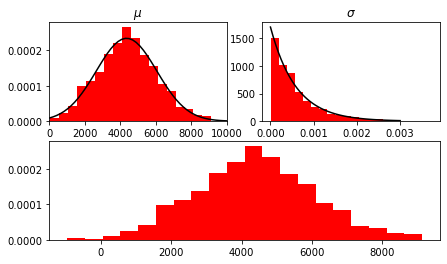

In [19]:
fig = plt.figure(figsize = (7, 4))
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[1, :])
ax1.hist(crime_prior_sim, color = 'red', bins = 20, density = True)
# ax1.set_title('Simulated crime rate all')

ax2 = fig.add_subplot(gs[0, 0])
ax2.hist(mu_sim, bins = 20, color = 'red', density = True)
x = np.linspace(0, 10000)
y = stats.norm.pdf(x, loc = 4350, scale = 1703)
ax2.plot(x, y, 'black')
ax2.set_title('$\mu$')
ax2.set_xlim(0,10000)

a = 1/1703

ax3 = fig.add_subplot(gs[0, 1])
ax3.hist(sigma_sim, bins = 20, color = 'red', density = True)
x = np.linspace(0, 0.003)
y = stats.expon.pdf(x, scale = a)
ax3.plot(x, y, color = 'black')
ax3.set_title('$\sigma$')

plt.show()